In [1]:
# Read CSV
import pandas as pd
df = pd.read_csv("Desktop/d206/data_files/d206-churn/churn_raw_data.csv")

In [3]:
# Get data profile
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [5]:
# Check for duplicates in data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

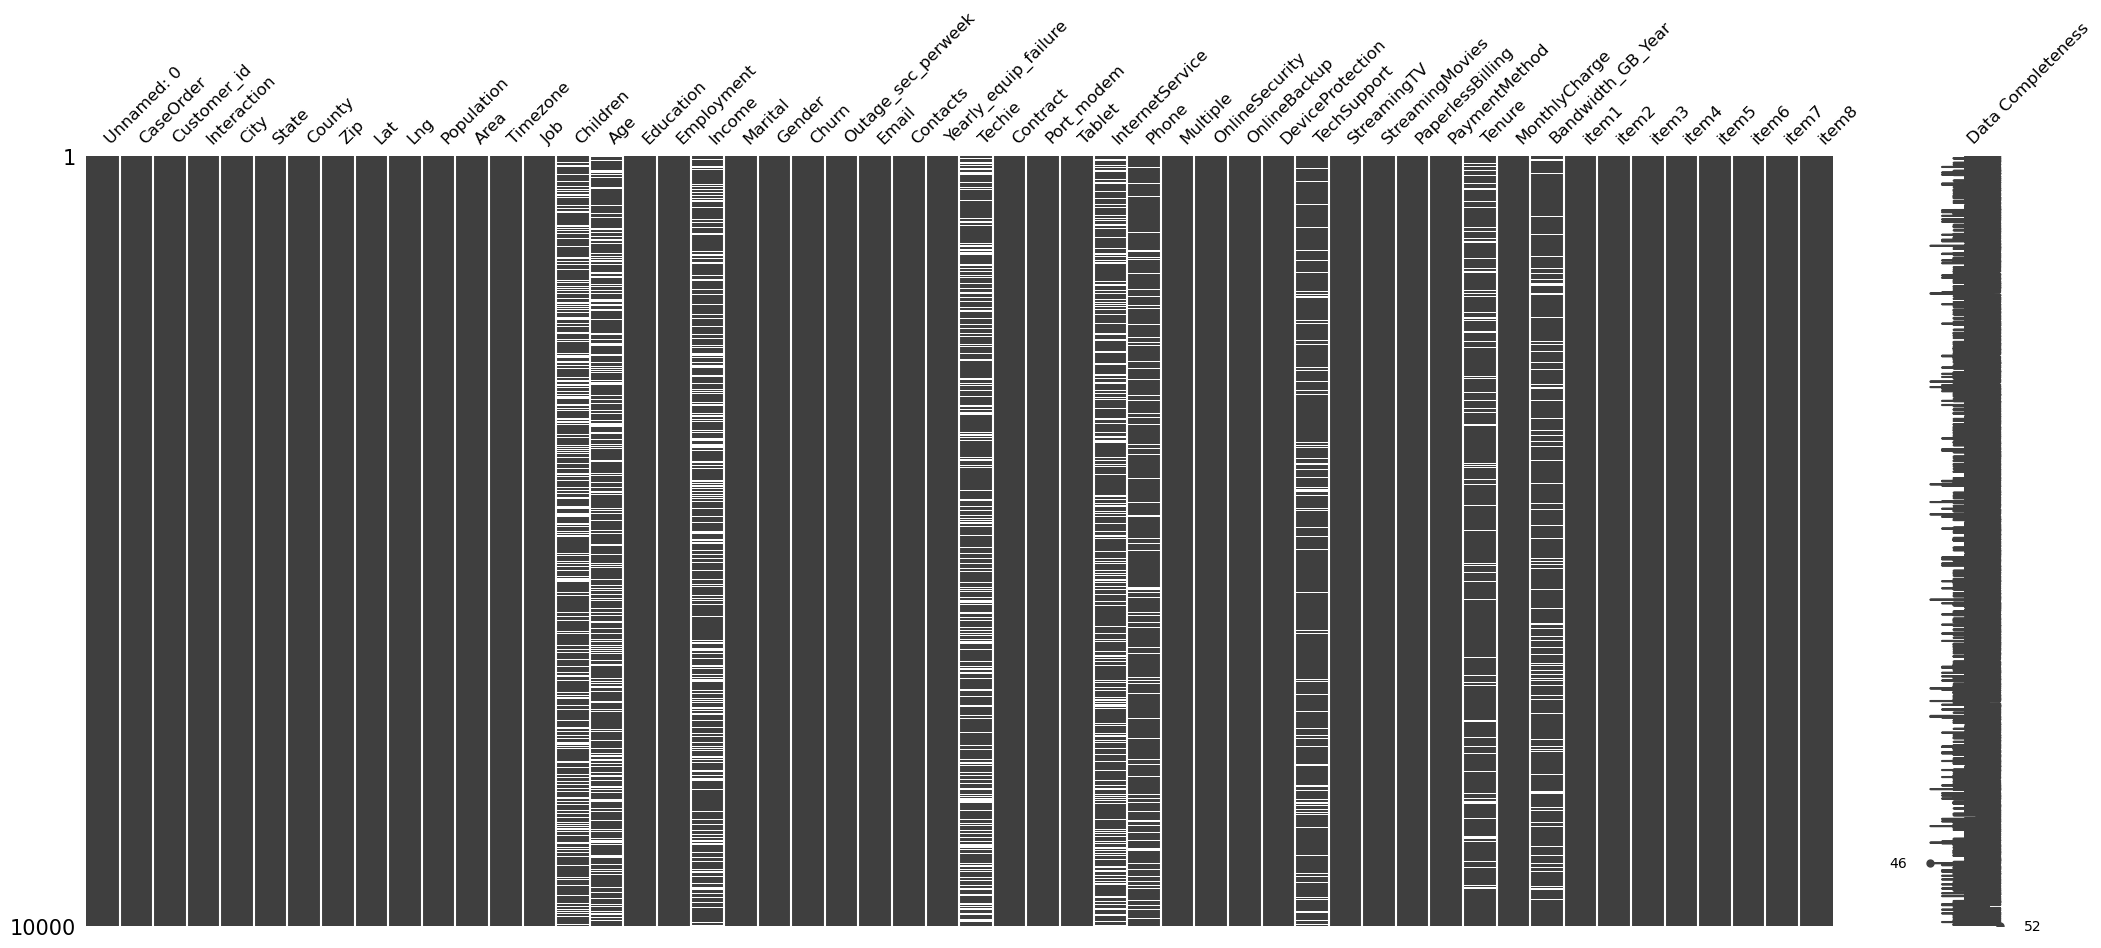

In [9]:
# Visualize nullity using missingno
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df, fontsize=12, labels=True)
plt.show()

Text(0.5, 1.0, 'Children Histogram Before Removing Missing Values')

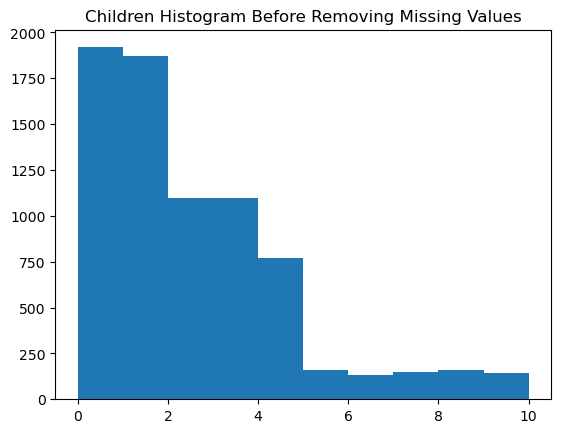

In [11]:
# Check distribution of 'Children' column
plt.hist(df['Children'])
plt.title('Children Histogram Before Removing Missing Values')

Text(0.5, 1.0, 'Age Histogram Before Removing Missing Values')

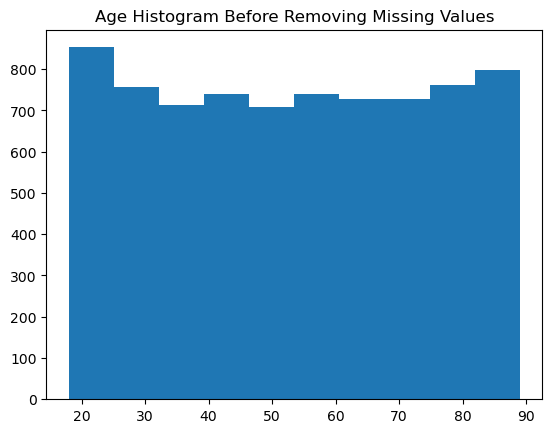

In [13]:
# Check distribution of 'Age' column
plt.hist(df['Age'])
plt.title('Age Histogram Before Removing Missing Values')

Text(0.5, 1.0, 'Income Histogram Before Removing Missing Values')

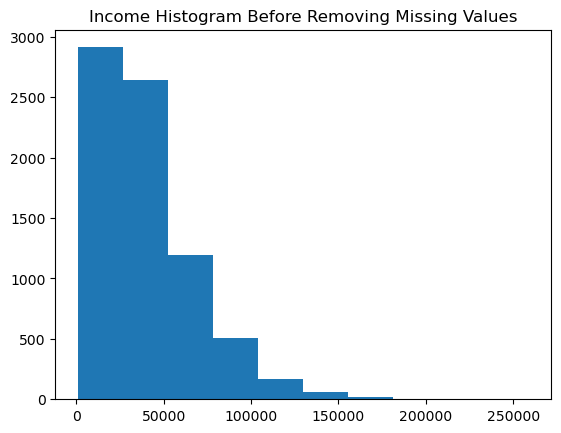

In [15]:
# Check distribution of 'Income' column
plt.hist(df['Income'])
plt.title('Income Histogram Before Removing Missing Values')

Text(0.5, 1.0, 'Tenure Histogram Before Removing Missing Values')

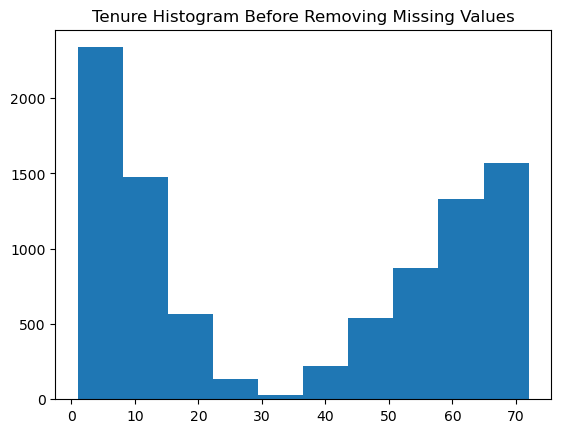

In [17]:
# Check distribution of 'Tenure' column
plt.hist(df['Tenure'])
plt.title('Tenure Histogram Before Removing Missing Values')

Text(0.5, 1.0, 'Bandwidth_GB_Year Histogram Before Removing Missing Values')

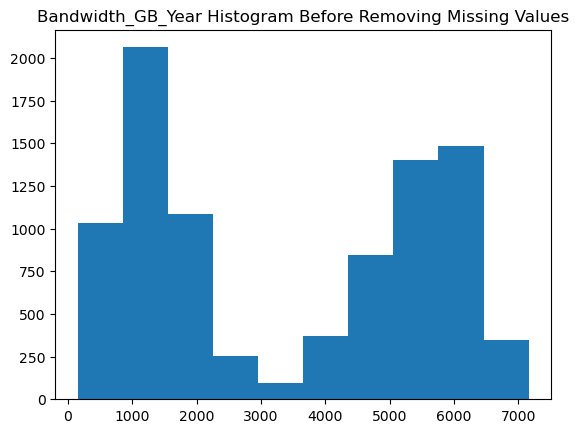

In [19]:
# Check distribution of 'Bandwidth_GB_Year' column
plt.hist(df['Bandwidth_GB_Year'])
plt.title('Bandwidth_GB_Year Histogram Before Removing Missing Values')

In [21]:
# Check unique values in 'Techie' column
df.Techie.unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
# Check unique values in 'InternetService' column
df.InternetService.unique()

array(['Fiber Optic', 'DSL', nan], dtype=object)

In [25]:
# Check unique values in 'Phone' column
df.Phone.unique()

array(['Yes', 'No', nan], dtype=object)

In [27]:
# Check unique values in 'TechSupport' column
df.TechSupport.unique()

array(['No', 'Yes', nan], dtype=object)

In [29]:
# Re-express categorical variables for 'Techie', 'Phone', 'TechSupport' columns
yes_no_dict = {'No': 0, 'Yes': 1}
df['Techie'] = df['Techie'].replace(yes_no_dict).infer_objects(copy=False)
df['Phone'] = df['Phone'].replace(yes_no_dict).infer_objects(copy=False)
df['TechSupport'] = df['TechSupport'].replace(yes_no_dict).infer_objects(copy=False)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/1030938303.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Techie'] = df['Techie'].replace(yes_no_dict).infer_objects(copy=False)
/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/1030938303.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Phone'] = df['Phone'].replace(yes_no_dict).infer_objects(copy=False)
/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/1030938303.py:5: FutureWarning: Downcasting behavior in `replace` i

In [31]:
# Re-express categorical variables for 'InternetService' column
internet_service_dict = {'Fiber Optic': 0, 'DSL': 1}
df['InternetService'] = df['InternetService'].replace(internet_service_dict).infer_objects(copy=False)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/3171921717.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['InternetService'] = df['InternetService'].replace(internet_service_dict).infer_objects(copy=False)


In [33]:
# Perform univariate imputation on 'Children' column
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Children'].fillna(df['Children'].median(), inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/3551405877.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Children'].fillna(df['Children'].median(), inplace=True)


In [35]:
# Perform univariate imputation on 'Age' column
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Age'].fillna(df['Age'].mean(), inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/2854530281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [37]:
# Perform univariate imputation on 'Income' column
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Income'].fillna(df['Income'].median(), inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/221145638.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [39]:
# Perform univariate imputation on 'Tenure' column
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/423327509.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tenure'].fillna(df['Tenure'].median(), inplace=True)


In [41]:
# Perform univariate imputation on 'Bandwidth_GB_Year' column
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median(), inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/2879265721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median(), inplace=True)


In [43]:
# Perform univariate imputation on 'Techie'
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Techie'].fillna(df['Techie'].mode()[0], inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/184775016.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Techie'].fillna(df['Techie'].mode()[0], inplace=True)


In [45]:
# Perform univariate imputation on 'Phone'
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Phone'].fillna(df['Phone'].mode()[0], inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/3232506101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Phone'].fillna(df['Phone'].mode()[0], inplace=True)


In [47]:
# Perform univariate imputation on 'TechSupport'
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['TechSupport'].fillna(df['TechSupport'].mode()[0], inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/450571529.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TechSupport'].fillna(df['TechSupport'].mode()[0], inplace=True)


In [49]:
# Perform univariate imputation on 'InternetService'
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/2214915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)


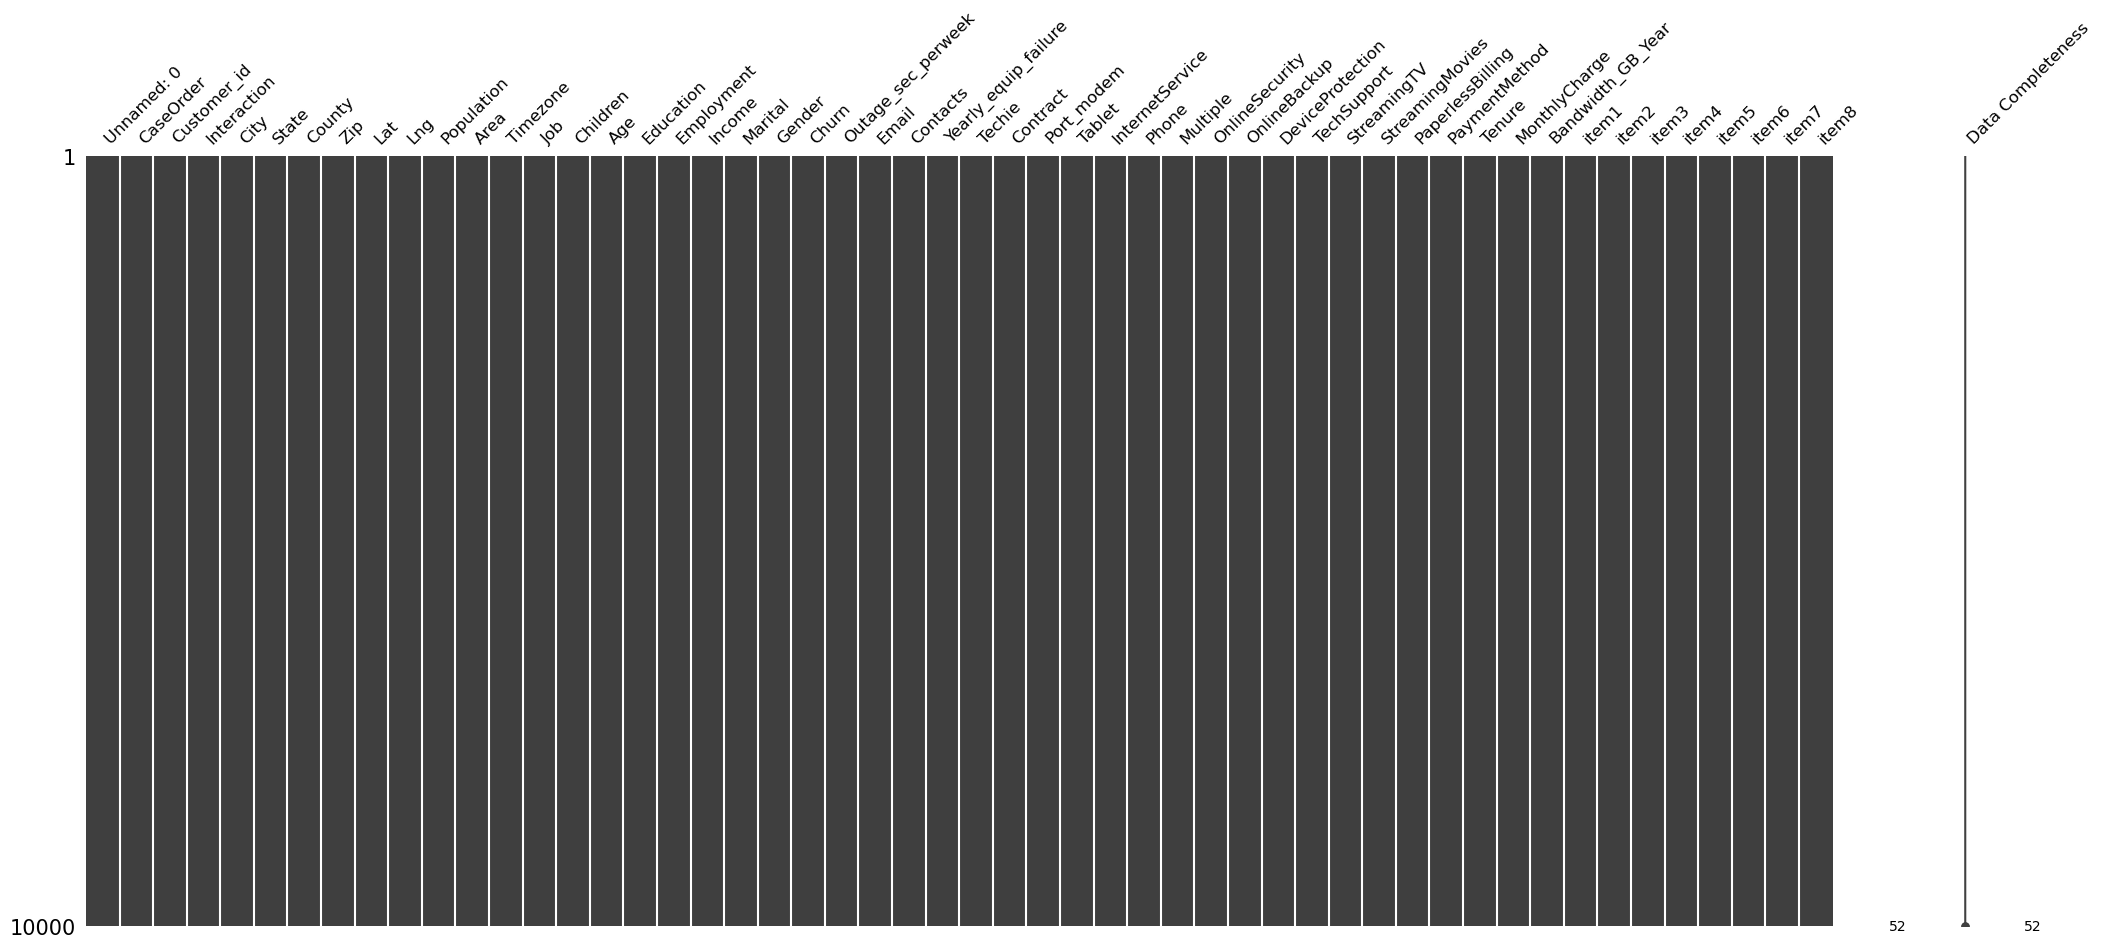

In [51]:
# Visualize nullity using missingno after imputation
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df, fontsize=12, labels=True)
plt.show()

Text(0.5, 1.0, 'Children Histogram After Imputation')

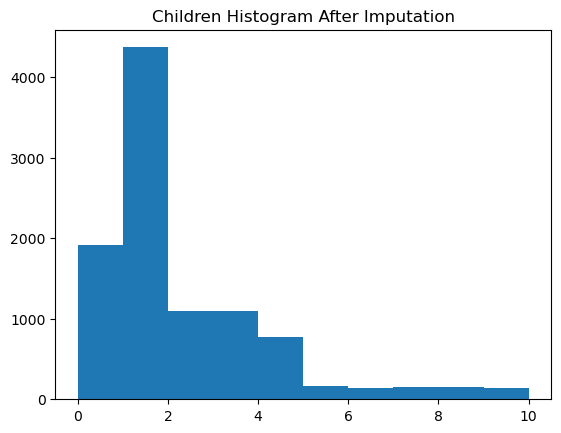

In [53]:
# Check distribution of 'Children' column after imputation 
plt.hist(df['Children'])
plt.title('Children Histogram After Imputation')

Text(0.5, 1.0, 'Age Histogram After Imputation')

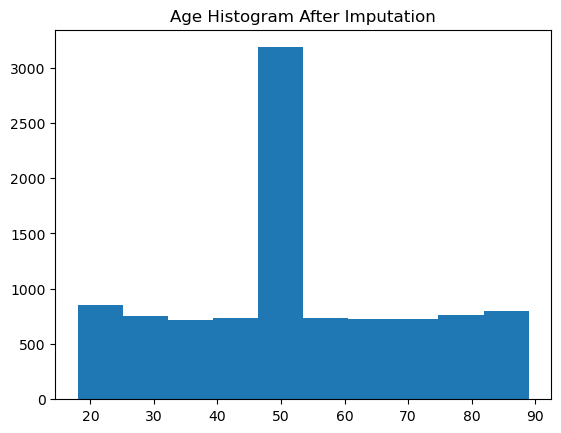

In [55]:
# Check distribution of 'Age' column after imputation 
plt.hist(df['Age'])
plt.title('Age Histogram After Imputation')

Text(0.5, 1.0, 'Income Histogram After Imputation')

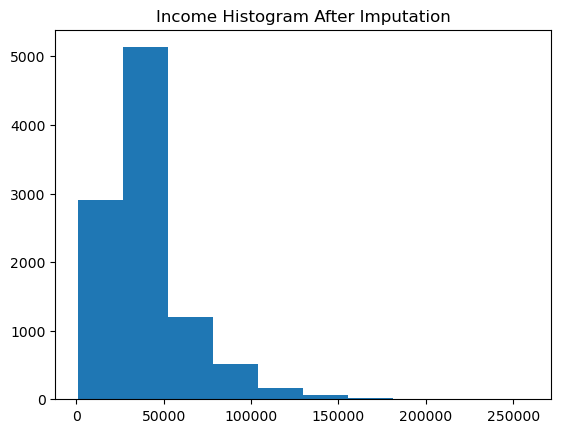

In [57]:
# Check distribution of 'Income' column after imputation 
plt.hist(df['Income'])
plt.title('Income Histogram After Imputation')

Text(0.5, 1.0, 'Tenure Histogram After Imputation')

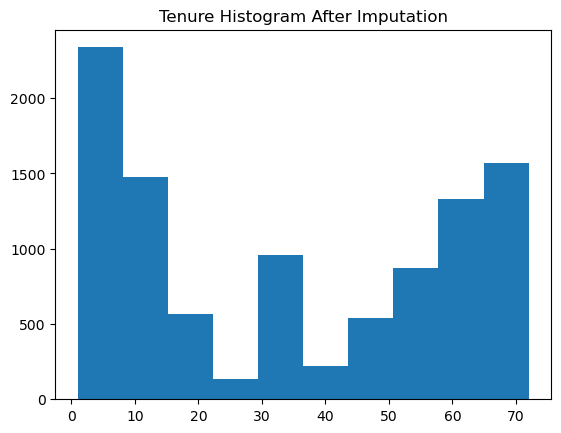

In [59]:
# Check distribution of 'Tenure' column after imputation
plt.hist(df['Tenure'])
plt.title('Tenure Histogram After Imputation')

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

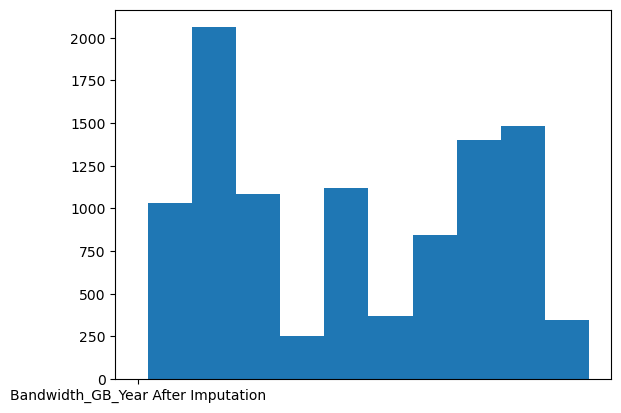

In [61]:
# Check distribution of 'Bandwidth_GB_Year' column after imputation 
plt.hist(df['Bandwidth_GB_Year'])
plt.hist('Bandwidth_GB_Year After Imputation')

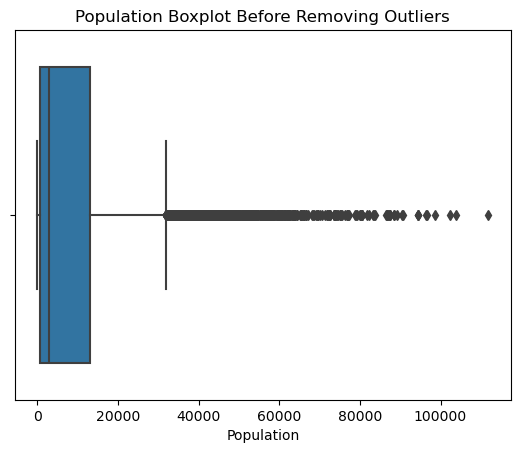

In [63]:
# Create boxplot for 'Population' to check for outliers
import seaborn
boxplot = seaborn.boxplot(x='Population', data=df).set(title='Population Boxplot Before Removing Outliers')

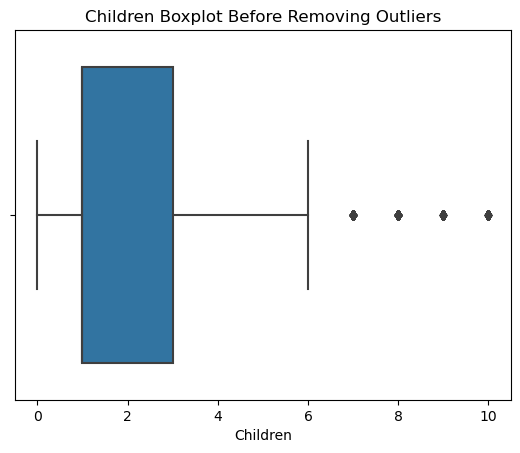

In [65]:
# Create boxplot for 'Children' to find outliers
boxplot = seaborn.boxplot(x='Children', data=df).set(title='Children Boxplot Before Removing Outliers')

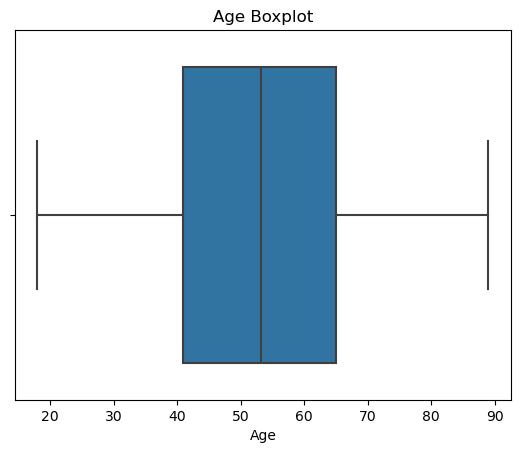

In [67]:
# Create boxplot for 'Age' to check for outliers
boxplot = seaborn.boxplot(x='Age', data=df).set(title='Age Boxplot')

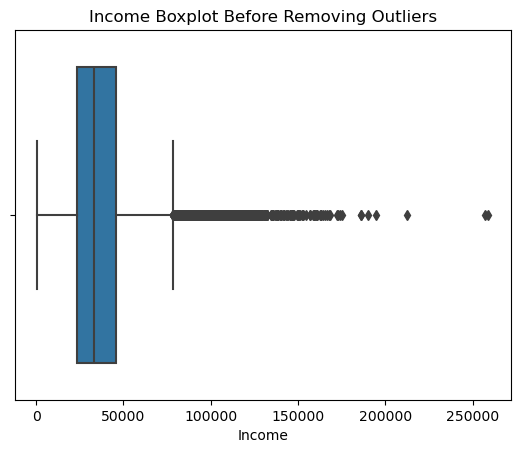

In [69]:
# Create boxplot for 'Income' to check for outliers
boxplot = seaborn.boxplot(x='Income', data=df).set(title='Income Boxplot Before Removing Outliers')

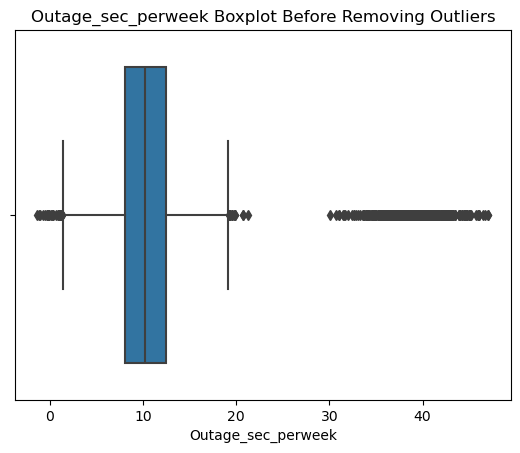

In [71]:
# Create boxplot for 'Outage_sec_perweek' to check for outliers
boxplot = seaborn.boxplot(x='Outage_sec_perweek', data=df).set(title='Outage_sec_perweek Boxplot Before Removing Outliers')

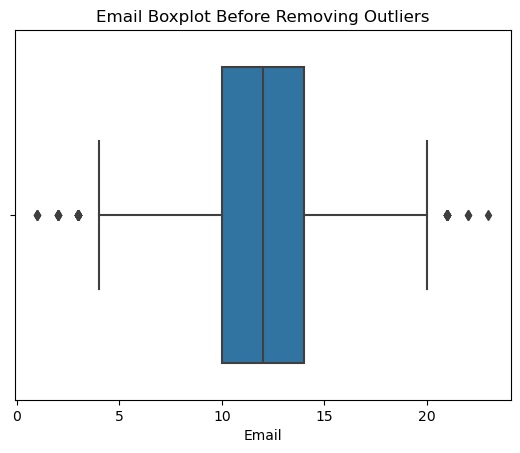

In [73]:
# Create boxplot for 'Email' to check for outliers
boxplot = seaborn.boxplot(x='Email', data=df).set(title='Email Boxplot Before Removing Outliers')

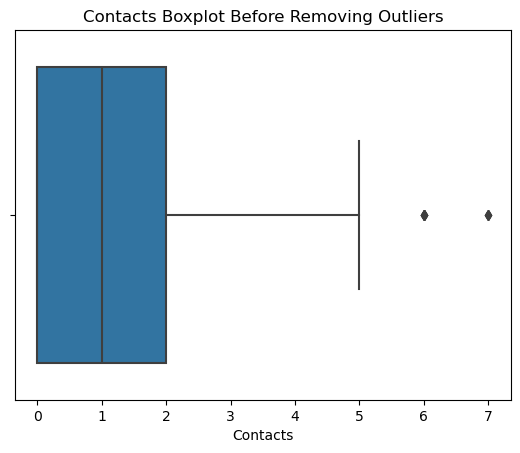

In [75]:
# Create boxplot for 'Contacts' to check for outliers
boxplot = seaborn.boxplot(x='Contacts', data=df).set(title='Contacts Boxplot Before Removing Outliers')

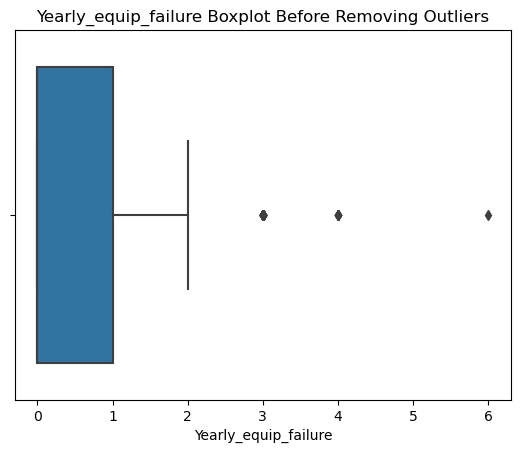

In [77]:
# Create boxplot for 'Yearly_equip_failure' to check for outliers
boxplot = seaborn.boxplot(x='Yearly_equip_failure', data=df).set(title='Yearly_equip_failure Boxplot Before Removing Outliers')

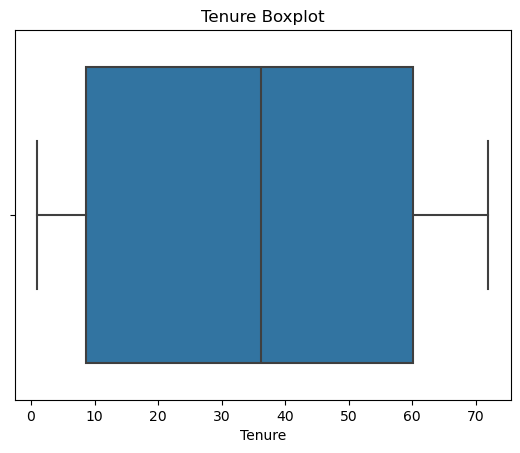

In [79]:
# Create boxplot for 'Tenure' to check for outliers
boxplot = seaborn.boxplot(x='Tenure', data=df).set(title='Tenure Boxplot')

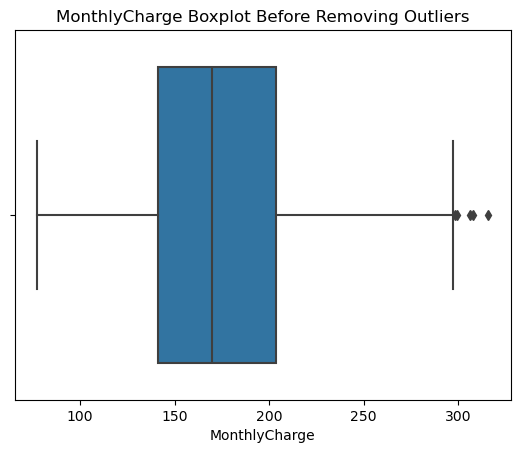

In [81]:
# Create boxplot for 'MonthlyCharge'
boxplot = seaborn.boxplot(x='MonthlyCharge', data=df).set(title='MonthlyCharge Boxplot Before Removing Outliers')

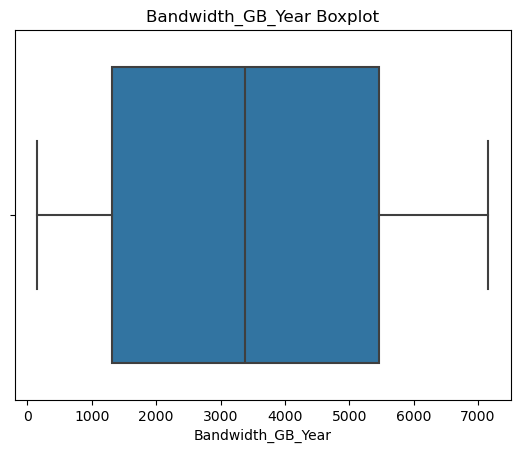

In [83]:
# Create boxplot for 'Bandwidth_GB_Year'
boxplot = seaborn.boxplot(x='Bandwidth_GB_Year', data=df).set(title='Bandwidth_GB_Year Boxplot')

In [85]:
# Use IQR method to find outlier values in 'Population' column
# Based on code from Bonthu, 2024
import numpy as np
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
Population_column = df['Population']
Population_outliers = detect_outliers_iqr(Population_column)
print("Number of Outliers: ", len(Population_outliers))
print("Outliers from IQR method: ", Population_outliers)

Number of Outliers:  937
Outliers from IQR method:  [31816, 31819, 31845, 31846, 31848, 31859, 31859, 31860, 31883, 31927, 31990, 32000, 32005, 32013, 32019, 32029, 32031, 32035, 32066, 32069, 32080, 32084, 32096, 32117, 32135, 32195, 32203, 32204, 32211, 32257, 32259, 32261, 32264, 32269, 32269, 32275, 32315, 32351, 32363, 32388, 32388, 32425, 32471, 32477, 32489, 32525, 32525, 32526, 32539, 32564, 32568, 32572, 32603, 32603, 32653, 32653, 32681, 32688, 32737, 32739, 32801, 32812, 32825, 32870, 32901, 32901, 32929, 32929, 32944, 32959, 33000, 33014, 33015, 33031, 33049, 33103, 33168, 33168, 33225, 33235, 33240, 33240, 33287, 33287, 33328, 33372, 33380, 33420, 33435, 33442, 33484, 33551, 33612, 33626, 33649, 33649, 33661, 33685, 33723, 33725, 33735, 33760, 33769, 33786, 33875, 33901, 33953, 33960, 33960, 33960, 33965, 33965, 34056, 34082, 34100, 34119, 34119, 34135, 34191, 34237, 34271, 34276, 34305, 34308, 34312, 34313, 34315, 34355, 34359, 34365, 34381, 34381, 34390, 34460, 34460, 34

In [87]:
# Treat outliers in Population using quartile capping and flooring
# Based on code from Bonthu, 2024
# Calculate Q1 and Q3
tenth_percentile = np.percentile(df['Population'], 10)
ninetieth_percentile = np.percentile(df['Population'], 90)
# Apply flooring and capping
b = np.where(df['Population']<tenth_percentile, tenth_percentile, df['Population'])
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print("New array:",b)

New array: [  211. 10446.  3735. ...   406. 30558. 12230.]


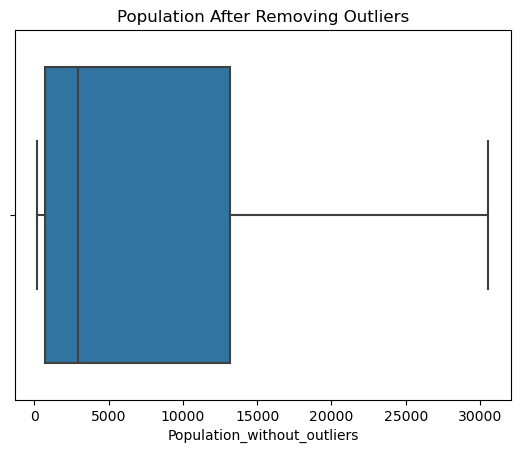

In [89]:
# Display Population boxplot after removing outliers
# Based on code from Bonthu, 2024
df['Population_without_outliers'] = b
seaborn.boxplot(x=df['Population_without_outliers']).set(title='Population After Removing Outliers')
plt.show()

In [91]:
# Use IQR method to find outlier values in 'Children' column
# Based on code from Bonthu, 2024
children_outliers = []
def detect_children_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            children_outliers.append(i)
    return children_outliers
Children_column = df['Children']
Children_outliers = detect_children_outliers_iqr(Children_column)
print("Number of Children Outliers: ", len(Children_outliers))
print("Outliers from IQR method: ", Children_outliers)

Number of Children Outliers:  451
Outliers from IQR method:  [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0

In [93]:
# Treat outliers in Children using quartile capping and flooring
# Based on code from Bonthu, 2024
tenth_percentile = np.percentile(df['Children'], 10)
ninetieth_percentile = np.percentile(df['Children'], 90)
c = np.where(df['Children']<tenth_percentile, tenth_percentile, df['Children'])
c = np.where(c>ninetieth_percentile, ninetieth_percentile, c)
print("New array:",c)

New array: [1. 1. 4. ... 1. 1. 1.]


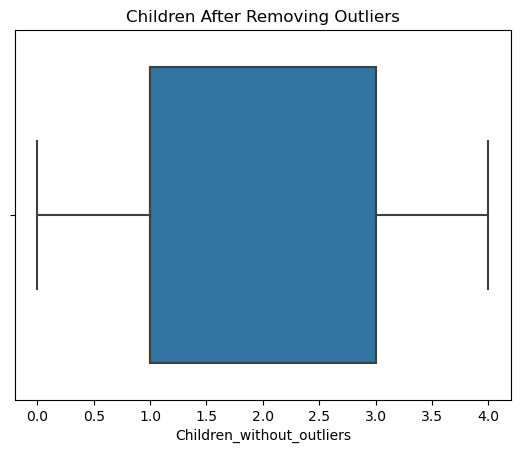

In [95]:
# Display Children boxplot after removing outliers
# Based on code from Bonthu, 2024
df['Children_without_outliers'] = c
seaborn.boxplot(x=df['Children_without_outliers']).set(title='Children After Removing Outliers')
plt.show()

In [97]:
# Use IQR method to find outlier values in 'Income' column
# Based on code from Bonthu, 2024
income_outliers = []
def detect_income_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            income_outliers.append(i)
    return income_outliers
Income_column = df['Income']
Income_outliers = detect_income_outliers_iqr(Income_column)
print("Number of Income Outliers: ", len(Income_outliers))
print("Outliers from IQR method: ", Income_outliers)

Number of Income Outliers:  759
Outliers from IQR method:  [78272.96, 78317.51, 78356.31, 78456.37, 78464.32, 78472.21, 78517.82, 78537.66, 78568.26, 78575.26, 78588.29, 78642.15, 78661.48, 78712.17, 78741.23, 78748.75, 78750.79, 78944.18, 78958.46, 78971.09, 78989.36, 79117.6, 79125.31, 79152.4, 79167.77, 79189.23, 79206.11, 79243.91, 79248.45, 79280.36, 79298.31, 79304.79, 79322.08, 79358.93, 79363.76, 79369.7, 79393.63, 79402.83, 79432.6, 79502.96, 79543.27, 79611.89, 79645.56, 79699.62, 79746.71, 79775.67, 79842.59, 79846.9, 79890.24, 79942.93, 80011.9, 80087.23, 80104.26, 80110.69, 80120.44, 80127.15, 80176.6, 80205.9, 80269.13, 80295.4, 80309.69, 80318.07, 80363.72, 80447.93, 80492.82, 80501.9, 80551.29, 80593.06, 80667.11, 80674.2, 80683.44, 80780.17, 80782.53, 80790.57, 80803.77, 80803.99, 80862.03, 80884.8, 80892.92, 80905.43, 80906.28, 80948.63, 81042.06, 81068.69, 81108.99, 81110.33, 81116.14, 81116.37, 81124.71, 81130.95, 81140.88, 81148.39, 81149.0, 81253.97, 81282.63, 813

In [99]:
# Treat outliers in Income using quartile capping annd flooring
# Based on code from Bonthu, 2024
tenth_percentile = np.percentile(df['Income'], 10)
ninetieth_percentile = np.percentile(df['Income'], 90)
i = np.where(df['Income']<tenth_percentile, tenth_percentile, df['Income'])
i = np.where(i>ninetieth_percentile, ninetieth_percentile, i)
print("New array:",i)

New array: [28561.99  21704.77  33186.785 ... 33186.785 16667.58  33186.785]


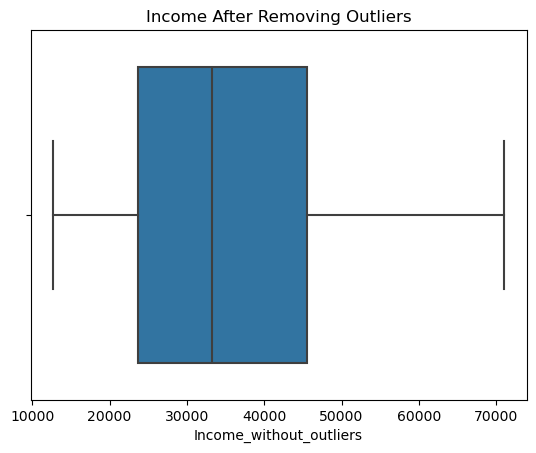

In [101]:
# Display Income boxplot after removing outliers
# Based on code from Bonthu, 2024
df['Income_without_outliers'] = i
seaborn.boxplot(x=df['Income_without_outliers']).set(title='Income After Removing Outliers')
plt.show()

In [103]:
# Use IQR method to find outlier values in 'Outage_sec_perweek' column
# Based on code from Bonthu, 2024
outage_outliers = []
def detect_outage_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outage_outliers.append(i)
    return outage_outliers
Outage_column = df['Outage_sec_perweek']
Outage_outliers = detect_outage_outliers_iqr(Outage_column)
print("Number of Outage Outliers: ", len(Outage_outliers))
print("Outliers from IQR method: ", Outage_outliers)

Number of Outage Outliers:  539
Outliers from IQR method:  [-1.348571, -1.195428336, -1.099934, -0.7871145, -0.5273962, -0.3524313, -0.339213544, -0.2143283, -0.2061448, -0.1528449, -0.1446439, 0.1138212, 0.16935054, 0.2787118, 0.3590731, 0.6836227, 0.840953106, 0.8525204, 0.9158456, 0.9945519, 1.049154, 1.109474, 1.201827908, 1.248096, 1.263475, 1.272757619, 19.19161, 19.24298756, 19.2727822, 19.30077262, 19.52825, 19.54727963, 19.57218433, 19.74133, 19.86807, 19.88305, 20.67544, 20.72948, 21.21619, 30.03937, 30.73298, 30.96987, 31.03370866, 31.48671, 31.51841, 31.69349532, 32.03094504, 32.44107, 32.58126, 32.60818, 32.82948, 33.0214399, 33.31661, 33.5499584, 33.63267, 33.64011, 33.66054506, 33.69568, 33.75384, 33.86731, 33.89824, 33.92041037, 33.93054202, 33.99457, 34.00463, 34.09965, 34.10805699, 34.1294, 34.13401, 34.1599, 34.20017, 34.33165, 34.4885, 34.51795, 34.52846, 34.71426, 34.71633, 34.7216, 34.74053, 34.77346, 34.79853584, 34.83255, 34.85048, 34.87548252, 34.90383866, 34.9

In [105]:
# Treat outliers in Outage_sec_perweek using quartile capping annd flooring
# Based on code from Bonthu, 2024
tenth_percentile = np.percentile(df['Outage_sec_perweek'], 10)
ninetieth_percentile = np.percentile(df['Outage_sec_perweek'], 90)
o = np.where(df['Outage_sec_perweek']<tenth_percentile, tenth_percentile, df['Outage_sec_perweek'])
o = np.where(i>ninetieth_percentile, ninetieth_percentile, o)
print("New array:",o)

New array: [15.114312 15.114312 15.114312 ... 15.114312 15.114312 15.114312]


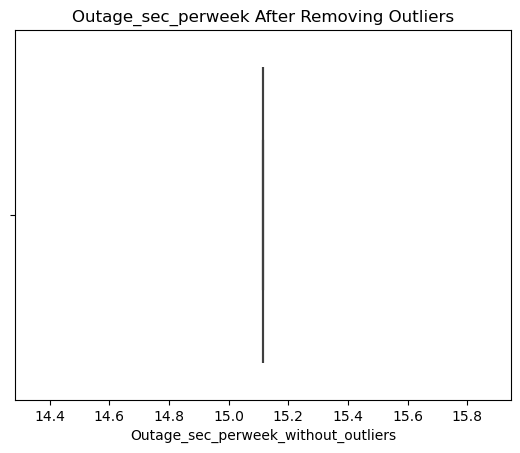

In [107]:
# Display Outage_sec_perweek boxplot after removing outliers
# Based on code from Bonthu, 2024
df['Outage_sec_perweek_without_outliers'] = o
seaborn.boxplot(x=df['Outage_sec_perweek_without_outliers']).set(title='Outage_sec_perweek After Removing Outliers')
plt.show()

In [109]:
# Use IQR method to find outlier values in 'Email' column
# Based on code from Bonthu, 2024
email_outliers = []
def detect_email_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            email_outliers.append(i)
    return email_outliers
Email_column = df['Email']
Email_outliers = detect_email_outliers_iqr(Email_column)
print("Number of Email Outliers: ", len(Email_outliers))
print("Outliers from IQR method: ", Email_outliers)

Number of Email Outliers:  38
Outliers from IQR method:  [1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 23]


In [111]:
# Replace outliers in 'Email' with NaN
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Email'] = np.where((df['Email'] < 4) | (df['Email'] > 20), np.nan, df['Email'])

In [113]:
# Impute null values in 'Email' with the median
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Email'].fillna(df['Email'].median(), inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/3136809962.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Email'].fillna(df['Email'].median(), inplace=True)


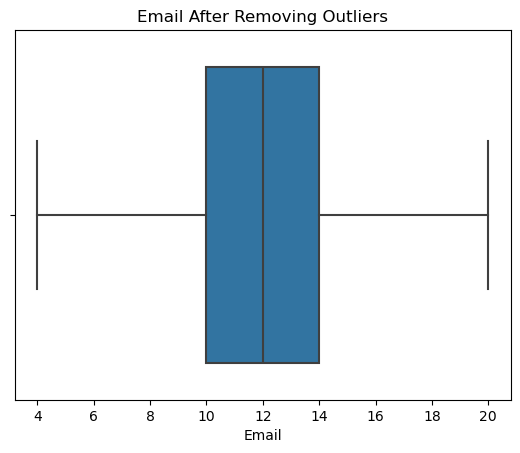

In [115]:
# Display 'Email' boxplot after removing outliers
seaborn.boxplot(x=df['Email']).set(title='Email After Removing Outliers')
plt.show()

In [117]:
# Use IQR method to find outlier values in 'Contacts' column
# [In-Text Citation: (Bonthu, 2024)
contacts_outliers = []
def detect_contacts_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            contacts_outliers.append(i)
    return contacts_outliers
Contacts_column = df['Contacts']
Contacts_outliers = detect_contacts_outliers_iqr(Contacts_column)
print("Number of Contacts Outliers: ", len(Contacts_outliers))
print("Outliers from IQR method: ", Contacts_outliers)

Number of Contacts Outliers:  8
Outliers from IQR method:  [6, 6, 6, 6, 6, 7, 7, 7]


In [119]:
# Replace outliers in 'Contacts' with NaN
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Contacts'] = np.where(df['Contacts'] >= 6, np.nan, df['Contacts'])

In [121]:
# Impute null values in 'Contacts' with the median
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Contacts'].fillna(df['Contacts'].median(), inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/2570945018.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Contacts'].fillna(df['Contacts'].median(), inplace=True)


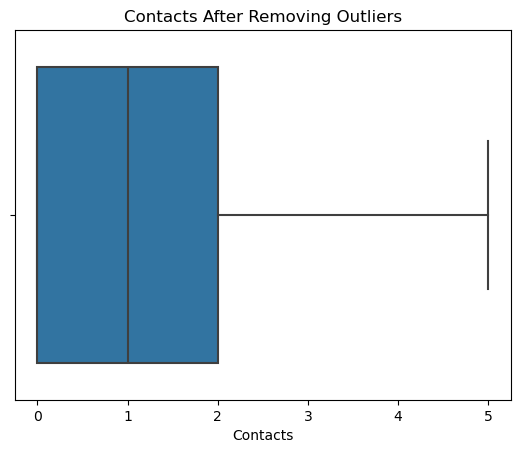

In [123]:
# Display 'Contacts' boxplot after removing outliers
import seaborn
import matplotlib.pyplot as plt
seaborn.boxplot(x=df['Contacts']).set(title='Contacts After Removing Outliers')
plt.show()

In [125]:
# Use IQR method to find outlier values in 'Yearly_equip_failure' column
# Based on code from Bonthu, 2024
yearly_outliers = []
def detect_yearly_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            yearly_outliers.append(i)
    return yearly_outliers
Yearly_column = df['Yearly_equip_failure']
Yearly_outliers = detect_yearly_outliers_iqr(Yearly_column)
print("Number of Yearly Outliers: ", len(Yearly_outliers))
print("Outliers from IQR method: ", Yearly_outliers)

Number of Yearly Outliers:  94
Outliers from IQR method:  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 6]


In [127]:
# Replace outliers in 'Yearly_equip_failure' with NaN
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Yearly_equip_failure'] = np.where(df['Yearly_equip_failure'] >= 3, np.nan, df['Yearly_equip_failure'])

In [129]:
# Impute null values in 'Yearly_equip_failure' with the median
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['Yearly_equip_failure'].fillna(df['Yearly_equip_failure'].median(), inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/622740137.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Yearly_equip_failure'].fillna(df['Yearly_equip_failure'].median(), inplace=True)


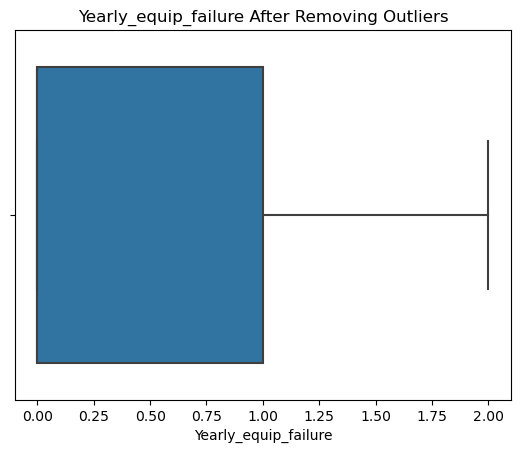

In [131]:
# Display 'Yearly_equip_failure' boxplot after removing outliers
seaborn.boxplot(x=df['Yearly_equip_failure']).set(title='Yearly_equip_failure After Removing Outliers')
plt.show()

In [133]:
# Use IQR method to find outlier values in 'Tenure' column
# Based on code from Bonthu, 2024
tenure_outliers = []
def detect_tenure_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            tenure_outliers.append(i)
    return tenure_outliers
Tenure_column = df['Tenure']
Tenure_outliers = detect_tenure_outliers_iqr(Tenure_column)
print("Number of Tenure Outliers: ", len(Tenure_outliers))
print("Outliers from IQR method: ", Tenure_outliers)

Number of Tenure Outliers:  0
Outliers from IQR method:  []


In [135]:
# Use IQR method to find outlier values in 'MonthlyCharge' column
# Based on code from Bonthu, 2024
import numpy as np
monthly_charge_outliers = []
def detect_monthly_charge_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            monthly_charge_outliers.append(i)
    return monthly_charge_outliers
Monthly_charge_column = df['MonthlyCharge']
Monthly_charge_outliers = detect_monthly_charge_outliers_iqr(Monthly_charge_column)
print("Number of Monthly Charge Outliers: ", len(Monthly_charge_outliers))
print("Outliers from IQR method: ", Monthly_charge_outliers)

Number of Monthly Charge Outliers:  5
Outliers from IQR method:  [298.1730235, 299.2061638, 306.268, 307.5281242, 315.8786]


In [137]:
# Replace outliers in 'MonthlyCharge' with NaN
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['MonthlyCharge'] = np.where(df['MonthlyCharge'] >= 298.1730235, np.nan, df['MonthlyCharge'])

In [139]:
# Impute null values in 'MonthlyCharge' with the median
# Based on code from Middleton (n.d., Slide 12, "Welcome To Getting Started With Detecting and Treating Outliers")
df['MonthlyCharge'].fillna(df['MonthlyCharge'].median(), inplace=True)

/var/folders/7w/6g7z51_s6w59vp3twn3hd_wh0000gn/T/ipykernel_28913/1812861963.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyCharge'].fillna(df['MonthlyCharge'].median(), inplace=True)


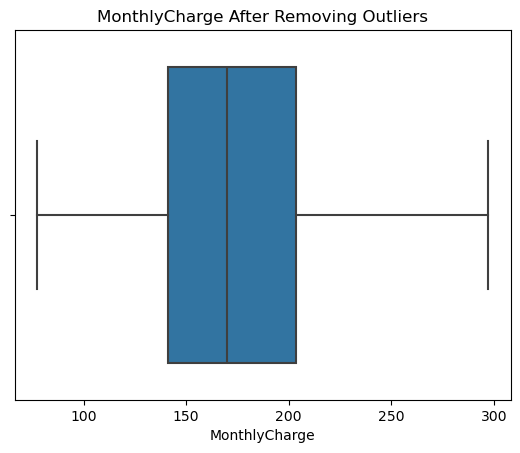

In [141]:
# Display 'MonthlyCharge' boxplot after removing outliers
seaborn.boxplot(x=df['MonthlyCharge']).set(title='MonthlyCharge After Removing Outliers')
plt.show()

In [143]:
# Check for non-null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           10000 non-null  int64  
 1   CaseOrder                            10000 non-null  int64  
 2   Customer_id                          10000 non-null  object 
 3   Interaction                          10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

In [145]:
# Check first 10 values in Age
df['Age'].head(n=10)

0    68.000000
1    27.000000
2    50.000000
3    48.000000
4    83.000000
5    83.000000
6    53.275748
7    53.275748
8    49.000000
9    86.000000
Name: Age, dtype: float64

In [147]:
# Round values in Age and change data type to integer
df['Age'] = df['Age'].round().astype(int)
# Recheck first 10 values in Age
df['Age'].head(n=10)

0    68
1    27
2    50
3    48
4    83
5    83
6    53
7    53
8    49
9    86
Name: Age, dtype: int64

In [149]:
# Check first 10 values in Outage_sec_perweek
df['Outage_sec_perweek'].head(n=10)

0     6.972566
1    12.014541
2    10.245616
3    15.206193
4     8.960316
5     7.814859
6    11.129094
7     7.594838
8     6.637259
9     9.230409
Name: Outage_sec_perweek, dtype: float64

In [151]:
# Round values in Outage_sec_perweek and convert to int
df['Outage_sec_perweek'] = df['Outage_sec_perweek'].round().astype(int)
# Check values
df['Outage_sec_perweek'].head(n=10)

0     7
1    12
2    10
3    15
4     9
5     8
6    11
7     8
8     7
9     9
Name: Outage_sec_perweek, dtype: int64

In [153]:
# Check first 10 values in Tenure
df['Tenure'].head(n=10)

0     6.795513
1     1.156681
2    15.754144
3    17.087227
4     1.670972
5     7.000994
6    13.236774
7    36.196030
8     8.220686
9     3.422086
Name: Tenure, dtype: float64

In [155]:
# Round values in Tenure to nearest whole number and convert to int
df['Tenure'] = df['Tenure'].round().astype(int)
# Recheck first 10 values in Tenure
df['Tenure'].head(n=10)

0     7
1     1
2    16
3    17
4     2
5     7
6    13
7    36
8     8
9     3
Name: Tenure, dtype: int64

In [157]:
# Check first 10 values in Children
df['Children'].head(n=10)

0    1.0
1    1.0
2    4.0
3    1.0
4    0.0
5    3.0
6    0.0
7    2.0
8    2.0
9    1.0
Name: Children, dtype: float64

In [159]:
# Convert values in Children to int
df['Children'] = df['Children'].astype(int)
# Recheck first 10 values in Children
df['Children'].head(n=10)

0    1
1    1
2    4
3    1
4    0
5    3
6    0
7    2
8    2
9    1
Name: Children, dtype: int64

In [161]:
# Check first 10 values in Contacts
df['Contacts'].head(n=10)

0    0.0
1    0.0
2    0.0
3    2.0
4    2.0
5    3.0
6    0.0
7    0.0
8    2.0
9    1.0
Name: Contacts, dtype: float64

In [163]:
# Convert values in Contacts to int
df['Contacts'] = df['Contacts'].astype(int)
# Recheck first 10 values in Contacts
df['Contacts'].head(n=10)

0    0
1    0
2    0
3    2
4    2
5    3
6    0
7    0
8    2
9    1
Name: Contacts, dtype: int64

In [165]:
# Check first 10 values in Techie
df['Techie'].head(n=10)

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
5    0.0
6    1.0
7    1.0
8    0.0
9    0.0
Name: Techie, dtype: float64

In [167]:
# Convert values in Techie to int
df['Techie'] = df['Techie'].astype(int)
# Recheck first 10 values in Techie
df['Techie'].head(n=10)

0    0
1    1
2    1
3    1
4    0
5    0
6    1
7    1
8    0
9    0
Name: Techie, dtype: int64

In [169]:
# Check first 10 values in InternetService
df['InternetService'].head(n=10)

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
5    0.0
6    1.0
7    1.0
8    1.0
9    0.0
Name: InternetService, dtype: float64

In [171]:
# Convert values in InternetService to int
df['InternetService'] = df['InternetService'].astype(int)
# Recheck first 10 values in InternetService
df['InternetService'].head(n=10)

0    0
1    0
2    1
3    1
4    0
5    0
6    1
7    1
8    1
9    0
Name: InternetService, dtype: int64

In [173]:
# Check first 10 values in Phone
df['Phone'].head(n=10)

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
5    1.0
6    1.0
7    0.0
8    1.0
9    1.0
Name: Phone, dtype: float64

In [175]:
# Convert values in Phone to int
df['Phone'] = df['Phone'].astype(int)
# Recheck first 10 values in Phone
df['Phone'].head(n=10)

0    1
1    1
2    1
3    1
4    0
5    1
6    1
7    0
8    1
9    1
Name: Phone, dtype: int64

In [177]:
# Convert values in TechSupport to int
df['TechSupport'] = df['TechSupport'].astype(int)
# Recheck first 10 values in TechSupport
df['TechSupport'].head(n=10)

0    0
1    0
2    0
3    0
4    1
5    0
6    1
7    0
8    0
9    0
Name: TechSupport, dtype: int64

In [179]:
# Check first 10 values in Email
df['Email'].head(n=10)

0    10.0
1    12.0
2     9.0
3    15.0
4    16.0
5    15.0
6    10.0
7    16.0
8    20.0
9    18.0
Name: Email, dtype: float64

In [181]:
# Convert values in Email to int
df['Email'] = df['Email'].astype(int)
# Recheck first 10 values in Email
df['Email'].head(n=10)

0    10
1    12
2     9
3    15
4    16
5    15
6    10
7    16
8    20
9    18
Name: Email, dtype: int64

In [183]:
# Check first 10 values in Yearly_equip_failure
df['Yearly_equip_failure'].head(n=10)

0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
5    1.0
6    1.0
7    0.0
8    0.0
9    0.0
Name: Yearly_equip_failure, dtype: float64

In [185]:
# Convert values in Yearly_equip_failure to int
df['Yearly_equip_failure'] = df['Yearly_equip_failure'].astype(int)
#Check values
df['Yearly_equip_failure'].head(n=10)

0    1
1    1
2    1
3    0
4    1
5    1
6    1
7    0
8    0
9    0
Name: Yearly_equip_failure, dtype: int64

In [187]:
# Check first 10 values in MonthlyCharge
df['MonthlyCharge'].head(n=10)

0    171.449762
1    242.948015
2    159.440398
3    120.249493
4    150.761216
5    184.401558
6    200.064886
7    114.754111
8    118.366844
9    163.005280
Name: MonthlyCharge, dtype: float64

In [189]:
# Round values in MonthlyCharge to 2 decimal points
df['MonthlyCharge'] = df['MonthlyCharge'].round(2)
# Recheck first 10 values in MonthlyCharge
df['MonthlyCharge'].head(n=10)

0    171.45
1    242.95
2    159.44
3    120.25
4    150.76
5    184.40
6    200.06
7    114.75
8    118.37
9    163.01
Name: MonthlyCharge, dtype: float64

In [191]:
# Check first 10 values in Bandwidth_GB_Year
df['Bandwidth_GB_Year'].head(n=10)

0     904.536110
1     800.982766
2    2054.706961
3    2164.579412
4     271.493436
5    1039.357983
6    1907.242972
7     979.612708
8    1312.874964
9     508.763791
Name: Bandwidth_GB_Year, dtype: float64

In [193]:
# Round values in Bandwidth_GB_Year to 2 decimal points
df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].round(2)
# Recheck first 10 values in Bandwidth_GB_Year
df['Bandwidth_GB_Year'].head(n=10)

0     904.54
1     800.98
2    2054.71
3    2164.58
4     271.49
5    1039.36
6    1907.24
7     979.61
8    1312.87
9     508.76
Name: Bandwidth_GB_Year, dtype: float64

In [195]:
# Check first 10 values in Income
df['Income'].head(n=10)

0    28561.990
1    21704.770
2    33186.785
3    18925.230
4    40074.190
5    33186.785
6    11467.500
7    26759.640
8    58634.510
9    50231.400
Name: Income, dtype: float64

In [197]:
# Round values in Income to 2 decimal points
df['Income'] = df['Income'].round(2)
# Recheck first 10 values values in Income
df['Income'].head(n=10)

0    28561.99
1    21704.77
2    33186.79
3    18925.23
4    40074.19
5    33186.79
6    11467.50
7    26759.64
8    58634.51
9    50231.40
Name: Income, dtype: float64

In [199]:
# Extract clean data
df.to_csv("Desktop/d206/data_files/d206-churn/clean_churn_data1.csv")

In [201]:
from sklearn.decomposition import PCA
# Define variables for PCA 
# Based on code from Middleton (n.d., slide 11, "Welcome To Getting Started With Principal Component Analysis (PCA)")
churn_features =  df[['Age', 'Children','Income', 'Population', 'Outage_sec_perweek', 
'Email','Contacts', 'Tenure', 'Bandwidth_GB_Year', 'Yearly_equip_failure']]
# Normalize data using standardization (mean normalization)
# Based on code from Middleton (n.d., slide 12, "Welcome To Getting Started With Principal Component Analysis (PCA)")
normalized_churn_features = (churn_features-churn_features.mean())/churn_features.std()
# Based on code from Middleton (n.d., slide 13, "Welcome To Getting Started With Principal Component Analysis (PCA)")
pca = PCA(n_components=churn_features.shape[1])
pca.fit(normalized_churn_features)

PCA(n_components=10)

In [203]:
# Based on code from Middleton (n.d., slide 13, "Welcome To Getting Started With Principal Component Analysis (PCA)")
churn_features_pca = pd.DataFrame(pca.transform(normalized_churn_features),columns=
['PC1','PC2','PC3','P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10'])
# Get PCA loadings
# Based on code from Middleton (n.d., slide 15, "Welcome To Getting Started With Principal Component Analysis (PCA)")
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4', 'PC5',
'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=normalized_churn_features.columns)
print(loadings)

                           PC1       PC2       PC3       PC4       PC5  \
Age                  -0.012968 -0.439893  0.422030  0.151942 -0.023524   
Children             -0.001926  0.496105 -0.048827 -0.297120  0.115999   
Income                0.006394  0.184867  0.357392 -0.194684  0.780756   
Population            0.000042 -0.302058 -0.439688 -0.190580  0.237154   
Outage_sec_perweek    0.016315  0.293693 -0.315514  0.556027  0.367855   
Email                -0.017985 -0.256361 -0.606483  0.024279  0.152612   
Contacts              0.003364 -0.375278  0.172579  0.453451  0.332120   
Tenure                0.706634 -0.026580  0.003820 -0.006660 -0.008182   
Bandwidth_GB_Year     0.706966  0.002784 -0.008746 -0.009633 -0.002855   
Yearly_equip_failure  0.007329  0.376078  0.034745  0.546717 -0.226236   

                           PC6       PC7       PC8       PC9      PC10  
Age                  -0.312981  0.273472 -0.549907  0.359161  0.020964  
Children             -0.379858  0.51541

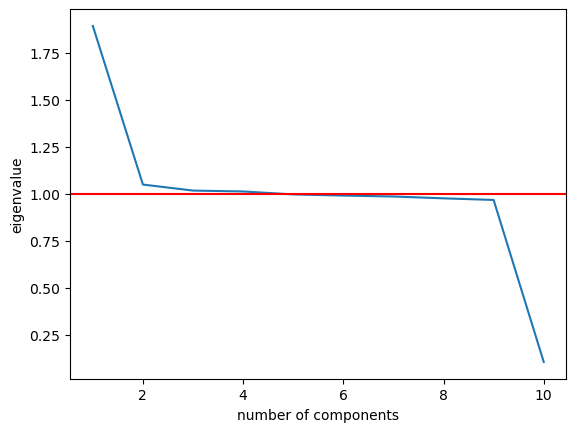

In [213]:
# Select PCs
# Calculate covariance 
# Based on code from Middleton (n.d., slide 17, "Welcome To Getting Started With Principal Component Analysis (PCA)")
cov_matrix = np.dot(normalized_churn_features.T, normalized_churn_features) / churn_features.shape[0]
# Calculate Vectors
# Based on code from Middleton (n.d., slide 17, "Welcome To Getting Started With Principal Component Analysis (PCA)")
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
# Create scree plot
# Based on code from Middleton (n.d., slide 17, "Welcome To Getting Started With Principal Component Analysis (PCA)")
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color="red")
plt.show()